Bevor Sie dieses Notebook abgeben, testen Sie, ob alles so funktioniert, wie Sie es erwarten. So sollten Sie z.B. den ** Kernel neu starten** (im Menu w&auml;hlen Sie Kernel$\rightarrow$Restart) und dann ** alle Zellen ausf&uuml;hren **  (im Menu w&auml;hlen Sie Cell$\rightarrow$Run All).

F&uuml;llen Sie alle Stellen, die mit  `YOUR CODE HERE` or "YOUR ANSWER HERE" aus. Sie d&uuml;rfen zus&auml;tzlich eigene Zellen und Funktionen definieren, nicht jedoch die Signaturen der gegebenen Funktionsr&uuml;mpfe &auml;ndern.

Bitte beachten Sie auch die "Hinweise zu den Abgaben"-Datei in Moodle.

In [1]:
NAME = "Fabian Flach"

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import numpy as np
import itlinsta18 as itlin
from scipy import sparse as sps
import matplotlib.pyplot as plt
plt.style.use('presentation')

Ein Euler-Bernpoulli-Balken ist ein einfaches Modell für die Biegung eines Balkens der Länge $L$ bei Belastung. 

Die vertikale Auslenkung sei gegeben durch die Funktion $y(x)$, $0\leq x\leq L$.
$$ EIy''''(x)=f(x) $$
wobei $E$ das Elastizitätsmodul (Materialkonstante) und $I$ das Flächenträgheitsmoment des Querschnitts ist 
(eine geometrische Größe). Beide sind konstant entlang des Balkens. 

$f(x)$ ist die Kraft pro Längeneinheit, die sich entlang des Balkens ändern kann.


Je nach Art der Einspannung/ des Auflagers erhält man verschiedene 
 Randwertprobleme (s.u.). Diese werden meist durch Finite Differenzen-Verfahren (s. letztes Kapitel) gelöst.

Zur numerischen Behandlung  wird die 4.Ableitung   durch die Differenzenapproximation
$$ y''''(x)= \frac{y(x-2h)-4y(x-h)+6y(x)-4y(x+h)+y(x+2h)}{h^4} $$
angenähert und in der Dgl. ersetzt. 
Dazu wird der Balken in $n+1$ Segmente unterteilt.
Es sei $h=\frac L{n+1}$ die Segmentbreite.
Für die Diskterisierungspunkte erhält man
$0=x_0<x_1<\dots <x_n<x_{n+1}=L$ mit $h=x_i-x_{i-1}$. 
Ersetzt man nun  $y''''$ durch die Differenzenapproximation, so erhält man
$$ y_{i-2}-4y_{i-1}+6y_i-4y_{i+1}+y_{i+2} = \frac{h^4}{EI}f(x_i), \qquad i=2,\dots,n-1 $$

Wir betrachten einen Balken, der an beiden Enden eingespannt ist: $$ y(0)=y'(0)=y(L)=y'(L)=0$$
Für die Randbedingungen erhält man mit Hilfe der Annäherung:
$$ y''''(x)\approx \frac{12y(x+h)-6y(x+2h)+\frac 4 3 y(x+3h)}{h^4} $$
für $x=0$. Diese Näherung gilt, falls $y(x)=y'(x)=0$ 

Insgesamt erhält man damit als Gleichungssystem
$$ \begin{pmatrix}
12&-6&\frac 4 3 \\
-4&6&-4&1\\
1&-4&6&-4&1\\
&& \ddots &\ddots &\ddots &\ddots &\ddots\\
&&&1&-4&6&-4&1\\
&&&&1&-4&6&-4&1\\
&&&&&1&-4&6&-4\\
&&&&&&\frac 4 3&-6&12
\end{pmatrix}
\begin{pmatrix}y_1\\ y_2\\ \vdots\\ \\ \vdots\\ y_{n-1}\\ y_n
\end{pmatrix}
=\frac{h^4}{EI}
\begin{pmatrix}f(x_1)\\ f(x_2)\\ \vdots \\ \\ \vdots\\f(x_{n-1})\\ f(x_n)
\end{pmatrix}
$$
Die Werte an den Rändern ergeben sich aus den Randbedingungen.

Geben Sie eine Begründung für die zweite und vorletzte Zeile des Gleichungssystems.

#### Antwort:
Da durch die Randbedingungen bereits festgelegt ist das $y_0 = 0 $  sowie  $y_{n+1}= 0$ . In der zweiten Zeile ist $y_{i-2} = y_0 = 0$ und in der vorletzten Zeile $y_{i+2} = y_{n+1} = 0$ Aus diesem Grund siend diese Werte in der Matrix überflüssig. 

Welche Konvergenzaussagen für Jacobi- und Gauss-Seidel-Verfahren für dieses Problem können Sie vorab treffen?

#### Antwort:
Da das Gauss-Seidel-Verfahren immer die aktuellsten Werte verwendet sind gegenüber dem Jacobi-Verfahren bessere Konvergenzeigenschaften zu erwarten. 
Das Jacobi wird vermutlich nicht konvergieren da es sich in unserem Beipsiel nicht um eine diagonaldominante Matrix handelt:  
Dritte Zeile  
$$ |a_{31}| + |a_{32}| + |a_{34}| + |a_{35}| > |a_{33}| $$
$$ 1 + 4 + 4 + 1 > 6 $$  

Das Gauss-Seidel-Verfahren konvergiert auch wenn die Matrix positiv definit ist und hat somit eine schwächere Voraussetzung als das Jacobi-Verfahren.

Wir betrachten als erstes einen Stahlbalken der Länge $L=15 m$, der  Tiefe $d=7cm$ und Breite $b=10cm$. The Dichte von Stahl ist
ungefähr $\rho=7850 kg/m^3$, $E=2\cdot 10^{11}$ N/m$^2$. $I=\frac{bd^3}{12}$.

Zuerst nehmen wir zusätzlich an, dass kein zusätzliches Gewicht den Balken belastet, so dass $f(x)$ nur das Eigengewicht des Balkens repräsentiert. 

Das Gewicht $f$ des Balkens pro $m$ ist somit $\rho\cdot b \cdot d$. Die Gewichtskraft ergibt sich daraus durch Multiplikation mit der Graviatationsbeschleunigung $g= -9.81 m/s^2$.

Erstellen Sie eine Funktion `asparse(n)`, die eine dünnbesetzte Version der Matrix (coo_matrix) in Abhängigkeit von $n$ berechnet und zurückgibt. Die Matrix hat dann die Dimension $n\times n$

In [6]:
def asparse(n):
    V = [12, -6, 4/3, -4, 6, -4, 1]
    I = [0, 0, 0, 1, 1, 1, 1]
    J = [0, 1, 2, 0, 1, 2, 3]
    
    for i in range(2, n-2):
        V.extend((1, -4, 6, -4, 1))
        I.extend((i, i, i, i, i))
        J.extend((i-2, i-1, i, i+1, i+2))
    V.extend((1, -4, 6, -4, 4/3, -6, 12))
    I.extend((n-2, n-2, n-2, n-2, n-1, n-1, n-1))
    J.extend((n-4, n-3, n-2, n-1, n-3, n-2, n-1))   
        
    #coo_matrix((data, (i, j)), [shape=(M, N)])
    A = sps.coo_matrix((V, (I, J)), shape=(n , n ))
    return A


In [7]:
# Autograder Tests
assert np.allclose(asparse(8).todense(), itlin.asparse(8).todense())

Implementieren Sie je eine Routine `jacobi_beam(y, c)` bzw. `gs_beam(y, c)`, die  einen Iterationsschritt für das Jacobi- bzw. das Gauss-Seidel-Verfahren implementiert. Implementieren Sie die Verfahren Rechenzeit- und speicherplatzsparend. 
Dies bedeutet insbesondere, dass Sie nirgendwo die komplette Matrix (auch nicht in dünnbetzter Form) speichern, sondern die Verfahren direkt so implementieren, dass es auf genau diese Struktur 
der Matrix passt.

$$ 12*y_0 - 6*y_1 + \frac{4}{3}*y_2 = c_0 $$  
$$ y_0 = \frac{c_0 + 6*y_1 - \frac{4}{3}*y_2}{12}$$    
$$ $$
$$ 1*y_{i-2} - 4*y_{i-1} + 6*y_{i} - 4*y_{i+1} + 1*y_{i+2} = c_i   $$  
$$ y_{i}  = \frac{c_i - 1*y_{i-2} + 4*y_{i-1} + 4*y_{i+1} - 1*y_{i+2}}{6} $$


In [8]:
def jacobi_beam(y, c):
    """
    Jacobi adapted for Euler-Bernoulli-beam
    One iteration only
    y: approximation to solution
    c: right hand side
    return: next iterate
    """
    n = len(y)
    result = np.zeros(len(y))
    result[0]   = (c[0]   + 6*y[1]     - 4/3*y[2]) / 12
    result[1]   = (c[1]   + 4*y[0]     + 4*y[2]   - y[3]) / 6
    result[n-2] = (c[n-2] - y[n-4]     + 4*y[n-3] + 4*y[n-1]) / 6
    result[n-1] = (c[n-1] - 4/3*y[n-3] + 6*y[n-2]) / 12
    
    for i in range(2, n-2):
        result[i] = (c[i] - y[i-2] + 4*y[i-1] + 4*y[i+1] - y[i+2]) / 6

    return result

def gs_beam(y, c):
    """
    Gauss-Seidel adapted for Euler-Bernoulli-beam
    One iteration only
    y: approximation to solution
    c: right hand side
    return: next iterate
    """
    n = len(y)
    y[0] = (c[0]   + 6*y[1]     - 4/3*y[2]) / 12
    y[1] = (c[1]   + 4*y[0]     + 4*y[2]   - y[3]) / 6
    for i in range(2, n - 2):
        y[i] = (c[i] - (y[i - 2] - 4 * y[i - 1] - 4 * y[i + 1] + y[i + 2])) / 6
        
    y[n - 2] = (c[n-2] - y[n-4]     + 4*y[n-3] + 4*y[n-1]) / 6
    y[n - 1] = (c[n-1] - 4/3*y[n-3] + 6*y[n-2]) / 12
    return y

In [9]:
# Autograder tests - Zelle nicht verändern oder löschen
y = np.ones(6)
c = np.ones(6)
assert np.allclose(jacobi_beam(y, c), itlin.jacobi_beam(y, c))

In [10]:
print(jacobi_beam(y, c))
itlin.jacobi_beam(y, c)

[0.47222222 1.33333333 1.16666667 1.16666667 1.33333333 0.47222222]


array([0.47222222, 1.33333333, 1.16666667, 1.16666667, 1.33333333,
       0.47222222])

In [11]:
# Autograder tests - Zelle nicht verändern oder löschen
y = np.ones(6)
c = np.ones(6)
assert np.allclose(gs_beam(y, c), itlin.gs_beam(y, c))

In [12]:
# Hidden tests - Zelle nicht verändern oder löschen
# BEGIN  HIDDEN TESTS
y = np.random.rand(7)
c = np.random.rand(7)
assert np.allclose(jacobi_beam(y, c), itlin.jacobi_beam(y, c))

In [13]:
# Hidden tests - Zelle nicht verändern oder löschen
# BEGIN  HIDDEN TESTS
y = np.random.rand(7)
c = np.random.rand(7)
assert np.allclose(gs_beam(y, c), itlin.gs_beam(y, c))

Schreiben Sie eine Routine `multi_it`, die die Iterationsschleife implementiert und die die oben von Ihnen implementierten Funktionen in jedem Iterationsschritt aufruft.
Die Iteration soll abgebrochen werden, wenn die maximale Iterationszahl überschritten wird oder die Norm des Inkrements kleiner als die geg. Toleranz ist. 


In [14]:
def multi_it(method, n, c, tol=1e-5, itmax=1000):
    """ 
    iteration loop over method (gauss seidel or jacobi) 
    method: gs or jacobi
    n: system dimension
    c: right hand side
    tol: tolerance (increment)
    itmax: maximum number of iterations
    return: 
        y: last iterate
        it: number of iterations used so far
        enorm: norm of increment
        kfac: Konvergenzrate
    """
    
    it = 0
    y = np.zeros(n)
    enorm = tol + 1
    enorm_1 = 0
    
    
    #print(enorm)
    while (enorm > tol and itmax > it):
        y_save = y.copy()
        it += 1
        #print(enorm)
        #print(it)
        
        y = method(y, c)
    
        enorm = np.linalg.norm(y - y_save)
        enorm_1 = enorm
        kfac = (enorm/enorm_1)
        
    return y, it, enorm, kfac

Implementieren Sie die Funktion $f$.

In [15]:
L = 15
d = 0.05
b = 0.1

I = (b*d**3)/12
p_ = 7850
E = 2e11

g = -9.81


In [19]:
def f(x):
    """
    load function, right hand side f
    """
    weight = p_*b *d
    return weight * g

In [20]:
# Autograder Tests
assert np.allclose(f(5.3), itlin.f(5.3))

Lösen Sie das System für $n=15$ mit den beiden Verfahren. 
Konvergieren die Verfahren? Falls ja, wie viele Iterationen sind jeweils notwendig, damit die Abbruchgenauigkeit mindestens $10^{-5}$ ist?

In [21]:
# Ihr Code für den Aufruf der  Jacobi-Iteration für das Testbeispiel mit n=15

n = 15
h = L/(n+1)
c_value = (h**4)/(E*I)*f(1)
c = np.full(n, c_value)

sol = multi_it(jacobi_beam, n, c, tol=1e-5, itmax=1000)
print("Letzte Iteration:\t", sol[0], 
      "\n\n# Iterationen:\t\t", sol[1], 
      "\nNorm des Inkrements:\t", sol[2], 
      "\nKonvergenzrate:\t\t", sol[3] )

sol = multi_it(jacobi_beam, n, c, tol=1e-5, itmax=100)
print("\n\nWeniger Iterationen:",
      "\nLetzte Iteration:\t", sol[0], 
      "\n\n# Iterationen:\t\t", sol[1], 
      "\nNorm des Inkrements:\t", sol[2], 
      "\nKonvergenzrate:\t\t", sol[3] )

Letzte Iteration:	 [-3.35675424e+200  8.10257203e+200 -1.22539175e+201  1.59506560e+201
 -1.89884359e+201  2.12524981e+201 -2.26488302e+201  2.31207134e+201
 -2.26488302e+201  2.12524981e+201 -1.89884359e+201  1.59506560e+201
 -1.22539175e+201  8.10257203e+200 -3.35675424e+200] 

# Iterationen:		 1000 
Norm des Inkrements:	 inf 
Konvergenzrate:		 nan


Weniger Iterationen: 
Letzte Iteration:	 [-5.90729178e+13  1.42590889e+14 -2.15647203e+14  2.80703239e+14
 -3.34162775e+14  3.74006252e+14 -3.98579219e+14  4.06883526e+14
 -3.98579219e+14  3.74006252e+14 -3.34162775e+14  2.80703239e+14
 -2.15647203e+14  1.42590889e+14 -5.90729178e+13] 

# Iterationen:		 100 
Norm des Inkrements:	 1836289346733498.5 
Konvergenzrate:		 1.0


C:\Users\fabia\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


Ihr Kommentar zu Ergebnissen/Verhalten der Jacobi-Iteration

#### Antwort:
Wie bereits zu Beginn vermutet Konvergiert das Jacobi-Verfahren nicht. Das Inkrement steigert sich extrem und die sich daraus ergebende Norm ist nach den 1000 Iterationen nicht mehr darstellbar bzw. geht gegen unendlich.

In [22]:
# Hidden tests Jacobi

In [23]:
# Ihr Code für den Aufruf der Gauss-Seidel-Iteration für das Testbeispiel mit n=15
n = 15
h = L/(n+1)
c_value = (h**4)/(E*I)*f(1)
c = np.full(n, c_value)

sol = multi_it(gs_beam, n, c, tol=1e-5, itmax=1000)
print("Letzte Iteration:\t", sol[0], 
      "\n\n# Iterationen:\t\t", sol[1], 
      "\nNorm des Inkrements:\t", sol[2], 
      "\nKonvergenzrate:\t\t", sol[3] )

sol = multi_it(gs_beam, n, c, tol=1e-5, itmax=2000)
print("\n\nitmax=2000",
      "\n# Iterationen:\t\t", sol[1], 
      "\nNorm des Inkrements:\t", sol[2])

sol = multi_it(gs_beam, n, c, tol=1e-5, itmax=3000)
print("\n\nitmax=3000",
      "\n# Iterationen:\t\t", sol[1], 
      "\nNorm des Inkrements:\t", sol[2])

Letzte Iteration:	 [-0.0123452  -0.04295339 -0.08323057 -0.12596501 -0.16529729 -0.19669132
 -0.21691022 -0.22399991 -0.21728229 -0.1973586  -0.1661224  -0.12678078
 -0.08388094 -0.04333922 -0.01246848] 

# Iterationen:		 1000 
Norm des Inkrements:	 0.0001256330240078456 
Konvergenzrate:		 1.0


itmax=2000 
# Iterationen:		 2000 
Norm des Inkrements:	 9.975241469208002e-06


itmax=3000 
# Iterationen:		 2000 
Norm des Inkrements:	 9.975241469208002e-06


Ihr Kommentar zum Gauss-Seidel-Ergebnis/Verhalten. (Plots dazu kommen weiter unten)

#### Antwort:
Da das Gauss-Seidel Verfahren für unser Beispiel konvergiert und A keine diagonaldominante Matrix ist können wir schließen, dass es sich bei A um eine positiv definite Matrix handelt. Unsere vorgegebene Toleranz erreicht das Verfahren nach 2000 Iterations-Schritten. Auch scheint es in diesem Bereich kaum noch zu einer Verbesserung der Lösung zu kommen.

In [24]:
# Hidden Tests Gauss-Seidel - Zelle nicht ändern

Plotten Sie die Lösung gegen die exakte Lösung $y(x)=\frac{f(x)x^2(L-x)^2}{24EI}$. Wie viele Iterationen und welche Toleranz sind notwendig, damit die Lösungen im Intervallmittelpunkt weniger als $10^{-2}$ auseinanderliegen?

In [25]:
def yex(x):
    return (f(x) * (x**2) * ((L-x)**2))/(24*E*I)

In [26]:
n = 15
h = L/(n+1)
c_value = (h**4)/(E*I)*f(1)
c = np.full(n, c_value)
y_result = []

for i in np.arange(0,L,L/n):
    y_result.append(yex(i))

gs_beam_result = multi_it(gs_beam, n, c, tol=1e-5, itmax=2000)[0]

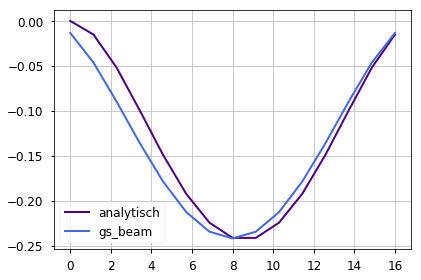

In [27]:
x = np.linspace(0, 16, n)
plt.plot(x, y_result, label="analytisch")
plt.plot(x, gs_beam_result, label="gs_beam")
plt.legend()
plt.show()

In [28]:
# Bestimmung der Anzahl der Iterationen
i = 1100
sol = 100
while(np.abs(yex(8) - sol) > 1e-2):
    i += 1
    sol = multi_it(gs_beam, n, c, tol=1e-5, itmax= i)[0][7]
print(sol, i, np.abs(yex(8) - sol))

-0.23151058678339312 1190 0.009988069216606832


Durch Ausprobieren bin ich auf die Lösung von 1190 Iterationen gekommen.

Nun wird der Balken durch ein Gewicht von $2000 kg$ belastet, das gleichmäßig verteilt zwischen $x=8$ und $x=10$ auf dem Balken liegt, so dass Sie in diesem Bereich $f$ entsprechend modifizieren müssen.

Lösen Sie das Problem wieder mit demselben  $n$. Plotten Sie die Lösung. Wo hat der Balken die größte Auslenkung?

In [29]:
def f_2000(x):
    """
    load function, right hand side f
    """
    if(x >= 8 and x <= 10):
        weight = p_ * b * d + 2000/(8-10)
    else:
        weight = p_ * b * d
    return weight * -g

(array([-0.05012714, -0.18764307, -0.39201254, -0.6409536 , -0.91022708,
       -1.17343307, -1.40184146, -1.56427681, -1.62707027, -1.55408314,
       -1.34317277, -1.02634096, -0.66992129, -0.33840813, -0.09464939]), 1000, 0.0008824543634601595, 1.0)


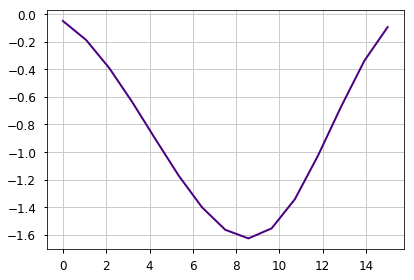

In [30]:
# Balken mit Zusatzgewicht
c = np.zeros(15)
for i in range(0, 15,1):
    c[i] = (h**4)/(E*I)*f_2000(i)

x = np.linspace(0, 15, 15)



print(multi_it(gs_beam, n, c, tol=1e-5, itmax=1000))

multi_it(gs_beam, n, c, tol=1e-5, itmax=50)
multi_it(gs_beam, n, c, tol=1e-5, itmax=1000)[0]
gs_beam_result = multi_it(gs_beam, n, c, tol=1e-5, itmax=1000)[0]
plt.plot(x, gs_beam_result)
plt.show()

Nun soll das ursprüngliche System mit einem cg-Verfahren gelöst werden.
Ws können Sie vorab über die Konvergenz sagen?

In [31]:
# Konvergenzaussagen mathematisch prüfen.
# Textantwort in die nächste Zelle.

# YOUR CODE HERE
#raise NotImplementedError()

A symmetrische positiv definite Matrix => CG-Verfahren konvergiert in höchstens n Iterationen gegen die exakte Lösung des
Gleichungssystems Ax = b. Da bereits das gs-Verfahren konvergiert ist können wir davon ausgehen, dass auch das cg-Verfahren konvergiert.

Nun soll das ursprüngliche System mit dem cg-Verfahren gelöst werden.
Schreiben Sie dazu eine Funktion `amaly(y)`, die die Matrix-Vektor-Multiplikation $A\cdot y$ für den Euler-Bernopulli-Balken effizient implementiert. Rückgabewert ist der Vektor $A\cdot y$.

Vergessen Sie nicht, das cg-Verfahren nach $n$ Iterationen neu zu starten. 

Eine effiziente Impementation ist wichtig!

Vergleichen Sie das Verfahren bzgl. Schrittzahl und Rechenzeit mit dem Gauss-Seidel-Verfahren. 

In [32]:
def amaly(y):

    n = len(y)
    result = np.zeros(n)
    result[0]   = 12*y[0]    - 6*y[1]     + 4/3*y[2]
    result[1]   = -4*y[0]    + 6*y[1]     - 4*y[2]    + y[3]
    result[n-2] = y[n-4]     - 4*y[n-3]   + 6*y[n-2]  - 4*y[n-1]
    result[n-1] = 4/3*y[n-3] - 6 * y[n-2] + 12*y[n-1]
    
    
    for i in range(2,n-2):
        result[i] = y[i-2]   - 4*y[i-1]   + 6*y[i]    - 4*y[i+1] + y[i+2]
    
    return result

In [33]:
import scipy.linalg as spla
import scipy as sp


def cg(amaly, c, y, itmax=100, eps=1e-5):
    """
    in: 
    amaly: Funktion, die A*y effizient für dieses konkrete Problem berechnet
    c: rechte Seite
    y: Startlösung
    itmax: maximal zulässige Anzahl Iterationen
    eps: Toleranz für die Norm des Residuums
    return:
    yn: Lösung bzw. aktuelle Iterierte bei Nichtkonvergenz
    it: Anzahl verwendeter Iterationen
    r: Residuum
    """
    
    counter = 0
    xn, it, r = cg_schritt(amaly, c, y, itmax, eps)
    iterationen = it
    
    
    while (spla.norm(r) > eps and counter < itmax):
        xn, it, r = cg_schritt(amaly, c, xn, itmax, eps)
        counter += 1
        iterationen += it
        
        
    return xn, iterationen, r

def cg_schritt(A, b, x, itmax = 5, eps = 1e-5):
    
    r = - amaly(x) + b
    d = r
    xn = x
    rs = np.dot(r,r)
    i = 0
    
    while (spla.norm(r) > eps**2 and i < itmax):
        i += 1 # Iterationszähler
        z = amaly(d)
        alpha = rs / np.dot(d, z)
        xn = xn + alpha*d
        rn = r -alpha*z
        rns = np.dot(rn, rn)
        beta = rns/rs
        d = rn + beta *d
        r = rn
        rs = rns
    return xn, i, r

In [34]:
L = 15
d = 0.05
b = 0.1

I = (b*d**3)/12
p_ = 7850
E = 2e11

g = -9.81

n = 15
h = L/(n+1)
c_value = (h**4)/(E*I)*f(1)
c = np.full(n, c_value)
y = np.zeros(n)
cg(amaly, c, y, itmax=1000, eps=1e-5)


(array([-0.01338463, -0.04663799, -0.09048008, -0.13705859, -0.17994888,
        -0.21415404, -0.23610483, -0.24365971, -0.23610483, -0.21415404,
        -0.17994888, -0.13705859, -0.09048008, -0.04663799, -0.01338463]),
 717,
 array([-1.05081814e-11, -1.37789943e-11,  1.93600935e-11, -1.55740462e-11,
         4.38970573e-12,  1.99564102e-11, -4.68099284e-11,  5.30342464e-11,
        -4.68475591e-11,  2.00149020e-11,  4.32719621e-12, -1.55242147e-11,
         1.93443713e-11, -1.38004791e-11, -1.04462639e-11]))

In [35]:
# Hidden test - nicht löschen

In [36]:
# Hidden test - nicht löschen

In [37]:
# Hidden test - nicht löschen oder verändern
n = 15

In [38]:
# Hidden test - nicht löschen

Meine Kommentare zur Implementation und zum Aufwandsvergleich:

Der einmalige Aufwand ist vermutlich höher als bei dem Jacobi- oder gs-Verfahren. Allerdings macht sich dies durch eine deutlich höhere Konvergenzgeschwindigkeit langfristig bezahlt.

In [39]:
# Hidden test - nicht löschen